# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
heart_data = pd.read_csv('https://raw.githubusercontent.com/FachryYusrie/Proyek-Machine-Learning-Heart-Disease-Analysis/refs/heads/main/Data/heart_disease_final.csv')

In [3]:
heart_data

,thalch,oldpeak,ca,Cholesterol_Group,Age_Group,trestbps_Group,thalch_Group,sex_Male,dataset_Hungary,dataset_Switzerland,...,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,Oldpeak_Category_Depresi ST Ringan,Oldpeak_Category_Depresi ST Sedang,Oldpeak_Category_Peningkatan ST Parah,Oldpeak_Category_Peningkatan ST Ringan,Oldpeak_Category_Peningkatan ST Sedang,Cluster
0,150.0,2.30,0.0,1,2,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,108.0,1.50,3.0,2,3,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,129.0,2.60,2.0,1,3,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,187.0,3.50,0.0,2,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,172.0,1.40,0.0,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,149.0,0.50,0.0,2,2,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
1009,151.0,0.40,0.0,2,3,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1010,145.0,3.75,3.0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1011,146.0,1.80,3.0,1,2,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Pisahkan fitur (X) dan target (y)
X = heart_data.drop(columns=['Cluster'])
y = heart_data['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Data Train shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Data Test shape: X_test={X_test.shape}, y_test={y_test.shape}")

Data Train shape: X_train=(810, 32), y_train=(810,)
Data Test shape: X_test=(203, 32), y_test=(203,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Melatih beberapa algoritma klasifikasi secara terpisah untuk melihat yang terbaik
# Latih algoritma K-Nearest Neighbors
knn = KNeighborsClassifier().fit(X_train, y_train)

# Latih algoritma Decision Tree
dt = DecisionTreeClassifier().fit(X_train, y_train)

# Latih algoritma RandomFOrestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

# Latih algoritma Support Vector Machine
svm = SVC().fit(X_train, y_train)

# Latih algoritma Naive Bayes
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Untuk mendapatkan F1-Score dari algoritma yang terbaik untuk dataset, maka dicoba beberapa model klasifikasi seperti K-Nearest Neighbors (KNN), Decision Tree, Random Forest, Support Vector Machine (SVM), dan Naive Bayes. Dilatih dengan data latih yang ada untuk melihat model klasifikasi terbaik yang dapat digunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

==== KNN Classifier ====
Confusion Matrix:
[[ 70   0]
 [  0 133]]
True Positive (TP): 133
False Positive (FP): 0
False Negative (FN): 0
True Negative (TN): 70
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

----------------------------------------



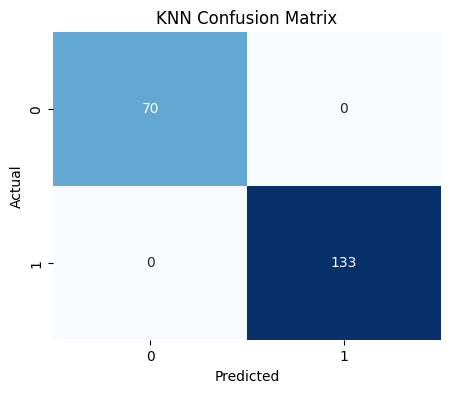

In [6]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = cm_knn.ravel()
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Decision Tree Classifier ====
Confusion Matrix:
[[ 70   0]
 [  0 133]]
True Positive (TP): 133
False Positive (FP): 0
False Negative (FN): 0
True Negative (TN): 70
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

----------------------------------------



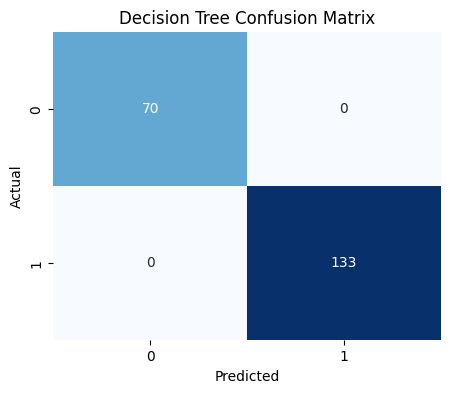

In [7]:
# Decision Tree
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm_dt.ravel()
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[ 70   0]
 [  0 133]]
True Positive (TP): 133
False Positive (FP): 0
False Negative (FN): 0
True Negative (TN): 70
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

----------------------------------------



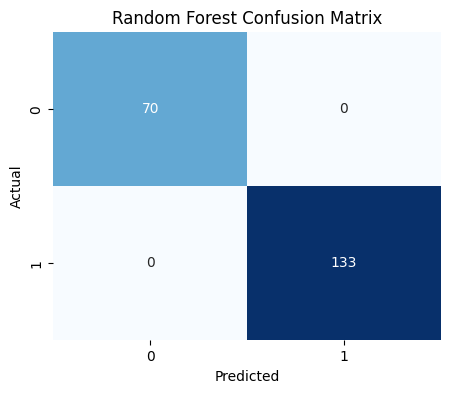

In [8]:
# Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix:
[[ 70   0]
 [  0 133]]
True Positive (TP): 133
False Positive (FP): 0
False Negative (FN): 0
True Negative (TN): 70
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

----------------------------------------



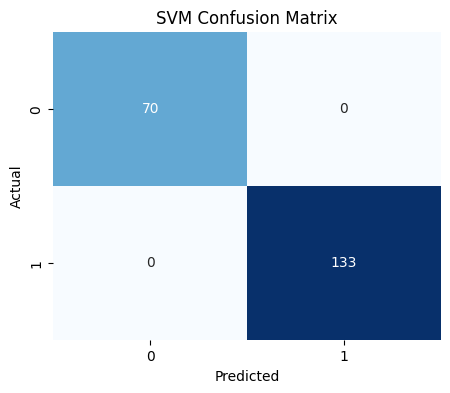

In [9]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

==== Naive Bayes Classifier ====
Confusion Matrix:
[[ 51  19]
 [  0 133]]
True Positive (TP): 133
False Positive (FP): 19
False Negative (FN): 0
True Negative (TN): 51
Accuracy: 0.9064
Precision: 0.8750
Recall: 1.0000
F1-Score: 0.9333

----------------------------------------



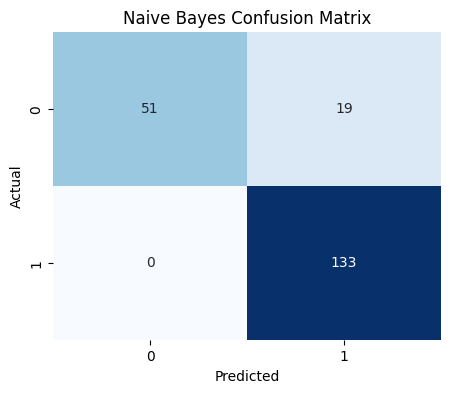

In [10]:
# Naive Bayes
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
tn, fp, fn, tp = cm_nb.ravel()
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil dalam bentuk "dictionary"
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Evaluasi setiap model dan hasil yang diperoleh
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Membuat sebuah tabel untuk merangkum hasil evaluasi setiap model
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Mengisi tabel dengan hasil evaluasi setiap model
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Mengoversi "dictionary" dalam bentuk tabel
summary_df = pd.DataFrame(rows)

# Menampilkan hasil tabel yang telah dibuat
print(summary_df)

                          Model  Accuracy  Precision  Recall  F1-Score
0     K-Nearest Neighbors (KNN)  1.000000      1.000     1.0  1.000000
1            Decision Tree (DT)  1.000000      1.000     1.0  1.000000
2            Random Forest (RF)  1.000000      1.000     1.0  1.000000
3  Support Vector Machine (SVM)  1.000000      1.000     1.0  1.000000
4              Naive Bayes (NB)  0.906404      0.875     1.0  0.933333


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Analisis hasil evaluasi dari beberapa model klasifikasi yang digunakan:

    a. **K-Nearest Neighbors (KNN)**
      - **Accuracy**: 100%
      - **Precision**: 100%
      - **Recall**: 100%
      - **F1-Score**: 100%

  b. **Decision Tree (DT)**
      - **Accuracy**: 100%
      - **Precision**: 100%
      - **Recall**: 100%
      - **F1-Score**: 100%

  c. **Random Forest (RF)**
      - **Accuracy**: 100%
      - **Precision**: 100%
      - **Recall**: 100%
      - **F1-Score**: 100%

   d. **Support Vector Machine (SVM)**
      - **Accuracy**: 100%
      - **Precision**: 100%
      - **Recall**: 100%
      - **F1-Score**: 100%

  e. **Naive Bayes (NB)**
      - **Accuracy**: 90.64%
      - **Precision**: 87.50%
      - **Recall**: 100%
      - **F1-Score**: 93.33%

  **Kesimpulan:**
    Dari model **KNN. Decision Tree, dan Random Forest**, didapatkan akurasi, presisi, recal, dan F1-Score yang **optimum**, yang berarti dapat mengklasifikasikan dengan sangat tepat (100%). Namun dari ketiga model tersebut, KNN menjadi model lebih baik karena waktu komputasi yang dibutuhkan lebih sedikit dibandingkan dengan model Decision Tree dan Random Forest.
2. Kelemahan dari K-Nearest Neighbors (KNN)
   - Komputasi berat untuk dataset yang besar.
   - Sensitif terhadap noise dan data yang tidak relevan.
   - Memori intensif karena menyimpan seluruh dataset.
3. Rekomendasi:
   - Memperbanyak jumlah data agar meningkatkan kualitas model machine learning yang ada.
   - Jika dataset yang dikumpulkan sudah sangat besar, maka bisa mencoba memanfaatkan model yang lain seperti Random Forest yang memiliki akurasi tinggi, robust terhadap overfitting, kemampuan menangani data yang tidak seimbang, menangani missing value dengan baik, dan cocok untuk dataset yang besar.